In [1]:
%matplotlib inline
from matplotlib import pyplot
import geopandas
import pandas as pd
from shapely.geometry import Polygon
from shapely.geometry import Point
from shapely.affinity import rotate
import numpy as np

from tile_units import TileUnit
from tile_map import Tiling

In [2]:
ak = geopandas.read_file("../data/imd-auckland-2018.gpkg")

# Octagons (4.8.8)

<AxesSubplot:>

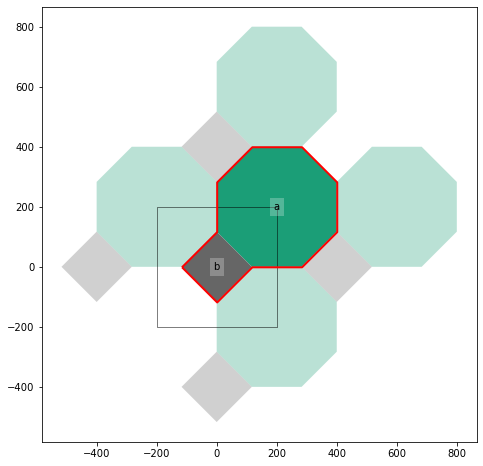

In [3]:
d = 400
tile_unit = TileUnit(tiling_type = "archimedean", code = "4.8.8",
                     spacing = d, crs = ak.crs)
tile_unit.plot(r = 1)

In [4]:
tiling = Tiling(tile_unit, ak, id_var = "DZ2018")

In [5]:
t = tiling.get_tiled_map(prioritise_tiles = True)

(<AxesSubplot:>, <Axes:label='inset_axes'>)

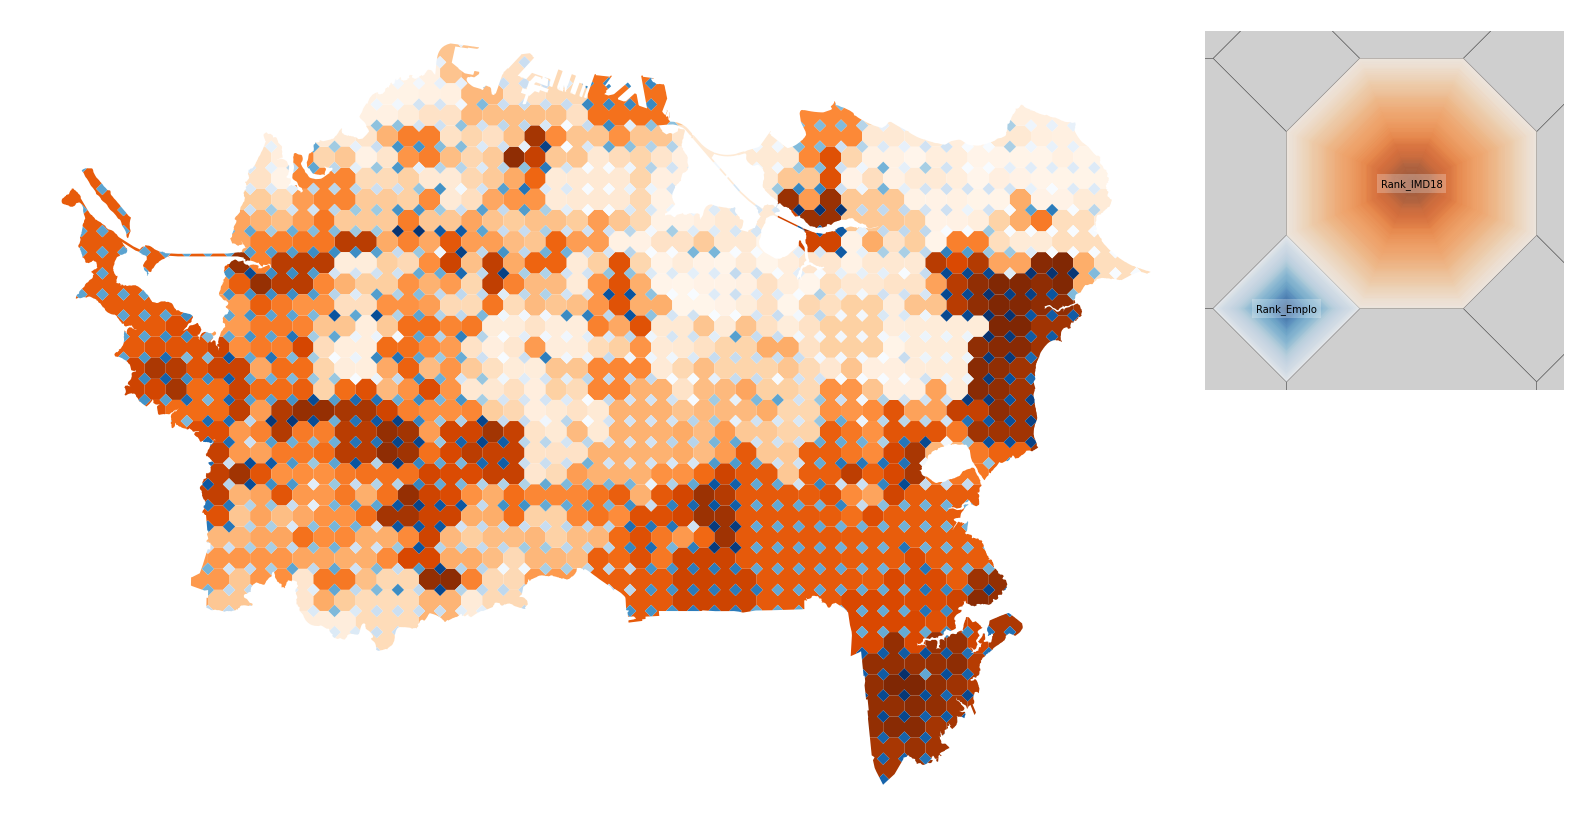

In [6]:
t.variables = dict(zip(list("ab"), [x for x in ak if "Rank" in x]))
t.colourmaps = dict(zip(t.variables.values(), ["Oranges", "Blues"]))

t.render(legend_zoom = 0.9)